# Least Angle Regression(LARS) for human activity recognition datasets

In [1]:
from pandas import read_table
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lars

In [2]:
filename = 'features.txt'
y_label='activity'
dataframe = read_table(filename, delim_whitespace=True,names=['id', 'feature_name'])
activity_map = {str(row.id):row.label_name for i, row in read_table('activity_labels.txt',delim_whitespace=True, names=['id', 'label_name']).iterrows()}
train_data_x = read_table('train/X_train.txt', delim_whitespace=True, names=dataframe.feature_name.tolist())
train_data_y = read_table('train/y_train.txt', delim_whitespace=True, names=[y_label])
train_data_y[y_label] = train_data_y[y_label].apply(lambda x: activity_map[str(x)])
train_data = pd.concat([train_data_y, train_data_x], axis=1)
test_data_x = read_table('test/X_test.txt', delim_whitespace=True, names=dataframe.feature_name.tolist())
test_data_y = read_table('test/y_test.txt', delim_whitespace=True, names=[y_label])
test_data_y[y_label] = test_data_y[y_label].apply(lambda x: activity_map[str(x)])
test_data= pd.concat([test_data_y,test_data_x], axis=1)
array = train_data.values
X = array[:,1:10]
Y = array[:,10]

/home/gautam/anaconda3/lib/python3.6/site-packages/pandas/io/parsers.py:709: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


In [12]:
kfold=KFold(n_splits=10,random_state=7)
scoring='neg_mean_squared_error'
model=Lars()
results=cross_val_score(model,X,Y,cv=kfold,scoring=scoring)

## For Train Datasets

In [13]:
print(results)

[-0.00703816 -0.00719259 -0.00736235 -0.00621491 -0.00568292 -0.00397424
 -0.00644349 -0.00477479 -0.00366444 -0.00696512]


In [14]:
print(results.mean())

-0.005931301778715035


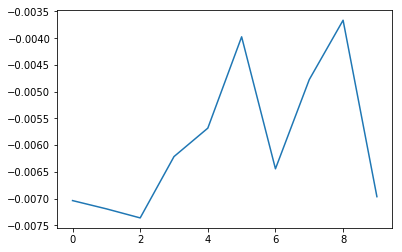

In [15]:
plt.plot(results)

# For Test Datasets

In [16]:
array = test_data.values
X = array[:,1:10]
Y = array[:,10]

In [17]:
kfold=KFold(n_splits=10,random_state=7)
scoring='neg_mean_squared_error'
model=Lars()
results=cross_val_score(model,X,Y,cv=kfold,scoring=scoring)

In [18]:
print(results)

[-0.00703816 -0.00719259 -0.00736235 -0.00621491 -0.00568292 -0.00397424
 -0.00644349 -0.00477479 -0.00366444 -0.00696512]


In [19]:
print(results.mean())

-0.005931301778715035


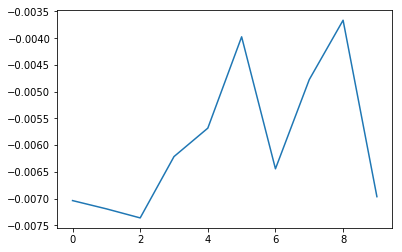

In [20]:
plt.plot(results)